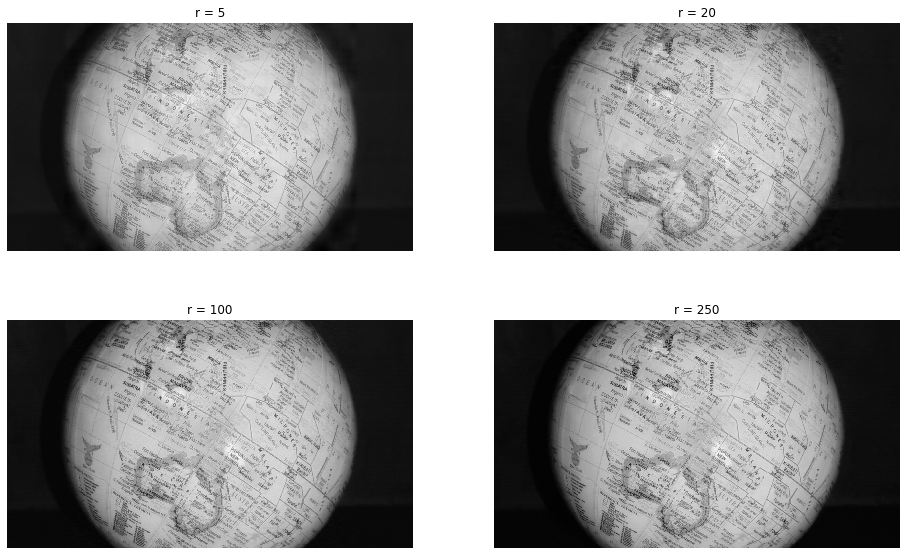

In [1]:
import numpy as np
from matplotlib import animation
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
from skimage import color

img = imread('globe.jpg')
img_lab = color.rgb2lab(img)
img_gray = color.rgb2gray(img)

## Compute SVD
U_a, S_a, VT_a = np.linalg.svd(img_lab[:,:,1], full_matrices=False)
U_b, S_b, VT_b = np.linalg.svd(img_lab[:,:,2], full_matrices=False)

S_a = np.diag(S_a)
S_b = np.diag(S_b)

plt.figure(figsize=(16,10))

j = 1
for r in (5, 20, 100, 250):
    # Construct approximate image
    img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
    img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
    img_approx = img_a_approx + img_b_approx + img_lab[:,:,0]
    img_approx = color.gray2rgb(img_approx)
    img_approx = np.mean(img_approx, -1)
    
    plt.subplot('22'+str(j))
    j += 1
    plt.title('r = '+str(r))
    plt.axis('off')
    plt.imshow(img_approx, cmap='gray')

plt.show()

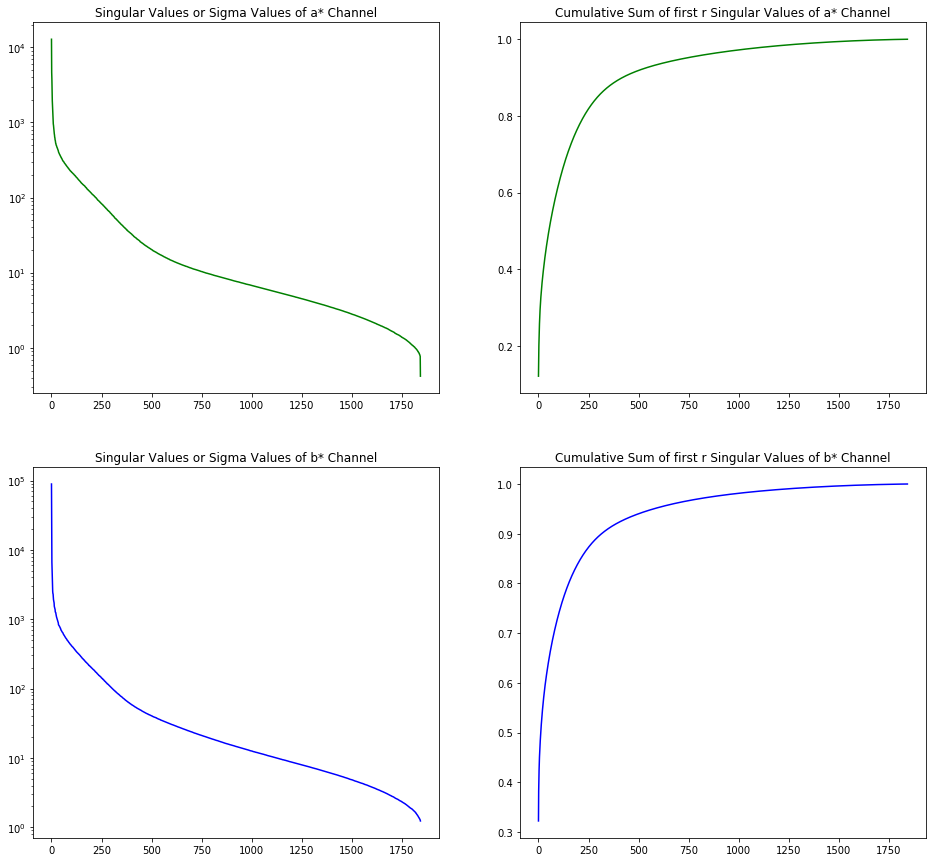

In [2]:
# Plot Sigma and Cumulative energy in first 'r' columns/rows
plt.figure(figsize=(16,15))
plt.subplot('221')
plt.title('Singular Values or Sigma Values of a* Channel')
plt.semilogy(np.diag(S_a), color='g')

plt.subplot('222')
plt.title('Cumulative Sum of first r Singular Values of a* Channel')
plt.plot(np.cumsum(np.diag(S_a))/np.sum(np.diag(S_a)), color='g')

plt.subplot('223')
plt.title('Singular Values or Sigma Values of b* Channel')
plt.semilogy(np.diag(S_b), color='b')

plt.subplot('224')
plt.title('Cumulative Sum of first r Singular Values of b* Channel')
plt.plot(np.cumsum(np.diag(S_b))/np.sum(np.diag(S_b)), color='b')

plt.show()

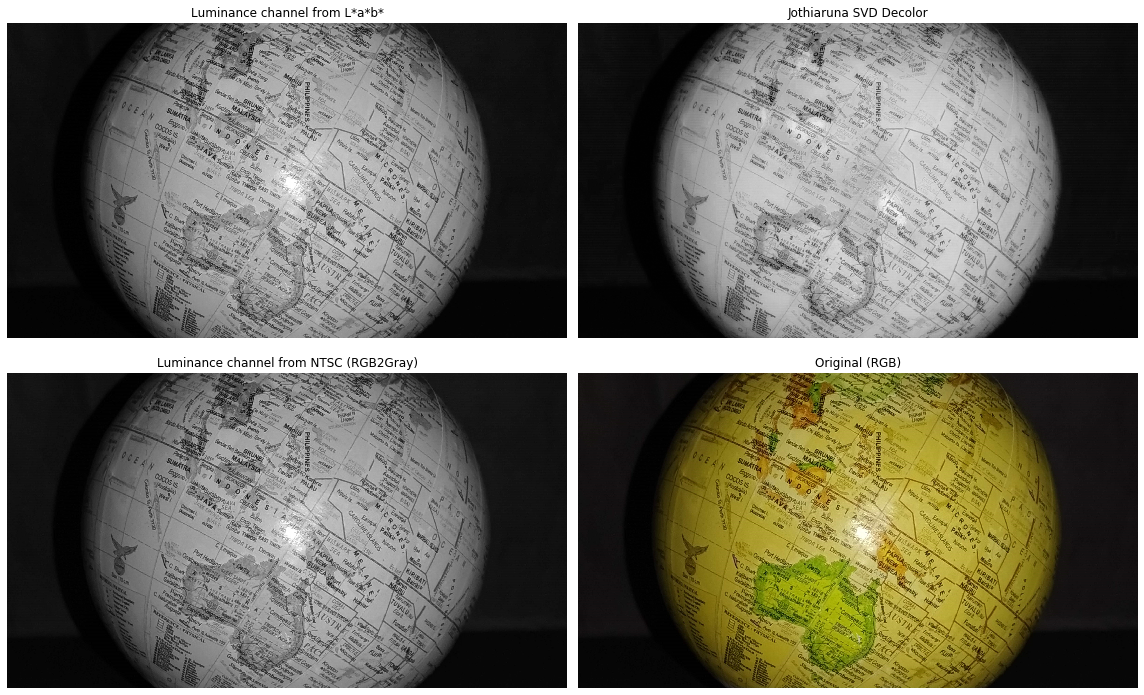

In [14]:
r = 1000

img_a_approx = U_a[:,:r] @ S_a[:r,:r] @ VT_a[:r,:]
img_b_approx = U_b[:,:r] @ S_b[:r,:r] @ VT_b[:r,:]
img_approx = img_a_approx + img_b_approx + img_lab[:,:,0]
img_approx = color.gray2rgb(img_approx)
img_approx = np.mean(img_approx, -1)

plt.figure(figsize=(16,10))
plt.subplot('221')
plt.axis('off')
plt.title('Luminance channel from L*a*b*')
plt.imshow(img_lab[:,:,0], cmap='gray')
plt.subplot('222')
plt.axis('off')
plt.title('Jothiaruna SVD Decolor')
plt.imshow(img_approx, cmap='gray')
plt.subplot('223')
plt.axis('off')
plt.title('Luminance channel from NTSC (RGB2Gray)')
plt.imshow(img_gray, cmap='gray')
plt.subplot('224')
plt.axis('off')
plt.title('Original (RGB)')
plt.imshow(img)
plt.tight_layout()
plt.savefig('globe_comparison.png')
plt.show()

In [6]:
# Save the images
imsave('l_of_ntsc.jpg', img_gray, cmap='gray')
imsave('l_of_lab.jpg', img_lab[:,:,0], cmap='gray')
imsave('svd_decolor_jothiaruna.jpg', img_approx, cmap='gray')